In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import TensorFlow and relevant Keras classes to setup the model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import tensorflow_datasets as tfds
pcam, pcam_info = tfds.load("patch_camelyon", with_info=True)
print(pcam_info)

2021-11-07 15:17:31.374983: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_path='/Users/melody.zhao/tensorflow_datasets/patch_camelyon/2.0.0',
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disabl

In [3]:
pcam

{'test': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>,
 'train': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>,
 'validation': <PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>}

In [4]:
pcam['train']

<PrefetchDataset shapes: {id: (), image: (96, 96, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>

In [13]:
pcam_list = list(pcam['train'])

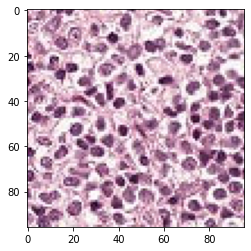

In [22]:
plt.imshow(pcam_list[0]['image'])

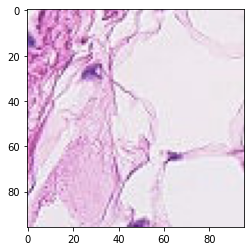

In [23]:
plt.imshow(pcam_list[1]['image'])

In [25]:
pcam_list[0]['image'].shape

TensorShape([96, 96, 3])

In [33]:
pcam_list[0]['image'].numpy()

array([[[247, 206, 222],
        [236, 197, 216],
        [223, 185, 208],
        ...,
        [252, 213, 232],
        [228, 187, 205],
        [250, 209, 227]],

       [[169, 122, 140],
        [255, 239, 255],
        [204, 160, 185],
        ...,
        [230, 191, 210],
        [210, 171, 190],
        [215, 176, 195]],

       [[206, 153, 173],
        [218, 166, 188],
        [227, 179, 203],
        ...,
        [176, 139, 157],
        [132,  93, 114],
        [158, 119, 140]],

       ...,

       [[199, 156, 186],
        [164, 124, 150],
        [175, 135, 159],
        ...,
        [255, 243, 238],
        [233, 213, 212],
        [255, 246, 245]],

       [[214, 180, 204],
        [177, 146, 164],
        [255, 230, 246],
        ...,
        [249, 238, 236],
        [255, 250, 251],
        [205, 189, 190]],

       [[194, 170, 186],
        [255, 237, 251],
        [225, 202, 212],
        ...,
        [250, 237, 246],
        [255, 247, 255],
        [222, 206, 217]]

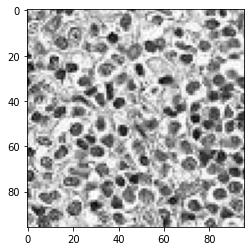

In [41]:
import numpy as np
from PIL import Image
import cv2

gr_im= Image.fromarray(pcam_list[0]['image'].numpy())
img_gray = cv2.cvtColor(pcam_list[0]['image'].numpy(), cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(pcam_list[0]['image'].numpy(), cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,  cmap = plt.cm.gray)

In [28]:
# Sobel Edge Detection
# Sobel Edge Detection
import cv2

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
img_blur = cv2.GaussianBlur(pcam_list[0]['image'],(96,96), SigmaX=0, SigmaY=0)
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection


# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)

cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)


error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'GaussianBlur'
> Overload resolution failed:
>  - GaussianBlur() missing required argument 'sigmaX' (pos 3)
>  - GaussianBlur() missing required argument 'sigmaX' (pos 3)
